In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
file_path = os.path.join("data", "Assessment-2-Associate-DS(in).csv")
df = pd.read_csv(file_path, parse_dates=['weekend_date'])

### Sorting the dates 

In [3]:
df = df.sort_values('weekend_date')

### Making all the columns names uniform

In [4]:
df.columns = ['weekend_date', 'channel', 'brand', 'category', 'sub_category',
       'serial_num', 'quantity']

In [5]:
print(f"The names of the columns are\n{df.columns.tolist()}\n\nThe dataset looks like this")

df.head()

The names of the columns are
['weekend_date', 'channel', 'brand', 'category', 'sub_category', 'serial_num', 'quantity']

The dataset looks like this


,weekend_date,channel,brand,category,sub_category,serial_num,quantity
17,1/10/2022,Channel1,B1,Cat2,Sub-Cat2,1,181
252,1/10/2022,Channel2,B2,Cat3,Sub-Cat3,2,115
251,1/10/2022,Channel2,B1,Cat1,Sub-Cat1,5,180
125,1/10/2022 0:00,Channel3,B1,Cat3,Sub-Cat4,3,214
43,1/4/2023,Channel1,B1,Cat2,Sub-Cat2,1,53


In [6]:
print(f'The data type for dates is : {df['weekend_date'].dtype}')

The data type for dates is : object


### *Cleaning the weekend_date column and converting it from object Data type to DateTime column data type*

In [7]:
df['weekend_date'] = pd.to_datetime(df['weekend_date'].str.split().str[0], dayfirst=True, errors='coerce')

In [8]:
df.head()

,weekend_date,channel,brand,category,sub_category,serial_num,quantity
17,2022-10-01,Channel1,B1,Cat2,Sub-Cat2,1,181
252,2022-10-01,Channel2,B2,Cat3,Sub-Cat3,2,115
251,2022-10-01,Channel2,B1,Cat1,Sub-Cat1,5,180
125,2022-10-01,Channel3,B1,Cat3,Sub-Cat4,3,214
43,2023-04-01,Channel1,B1,Cat2,Sub-Cat2,1,53


In [9]:
print(f'Now the data type for dates is : {df['weekend_date'].dtype}')

Now the data type for dates is : datetime64[ns]


In [10]:
print(f'The shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns.')

The shape of the dataset is 600 rows and 7 columns.


In [11]:
print(f"There are {df['weekend_date'].isna().sum()} number of missing or invalid dates in the weekend_date column.")

There are 0 number of missing or invalid dates in the weekend_date column.


In [12]:
print(f'There are {df["serial_num"].nunique()} unique products in the dataset.')

There are 5 unique products in the dataset.


In [13]:
print(df['channel'].value_counts())

channel
Channel2    376
Channel1    118
Channel3    106
Name: count, dtype: int64


In [14]:
print(df.dtypes)

weekend_date    datetime64[ns]
channel                 object
brand                   object
category                object
sub_category            object
serial_num               int64
quantity                 int64
dtype: object


In [15]:
print(f'There are {df.dtypes.value_counts().to_dict()} data types in the dataset.')

There are {dtype('O'): 4, dtype('int64'): 2, dtype('<M8[ns]'): 1} data types in the dataset.


In [16]:
print(f"Missing values per column in the dataset are as follows:\n\n{df.isnull().sum()} .")

Missing values per column in the dataset are as follows:

weekend_date    0
channel         0
brand           0
category        0
sub_category    0
serial_num      0
quantity        0
dtype: int64 .


# *Sales Trend with respect to Products or Serial Numbers here*

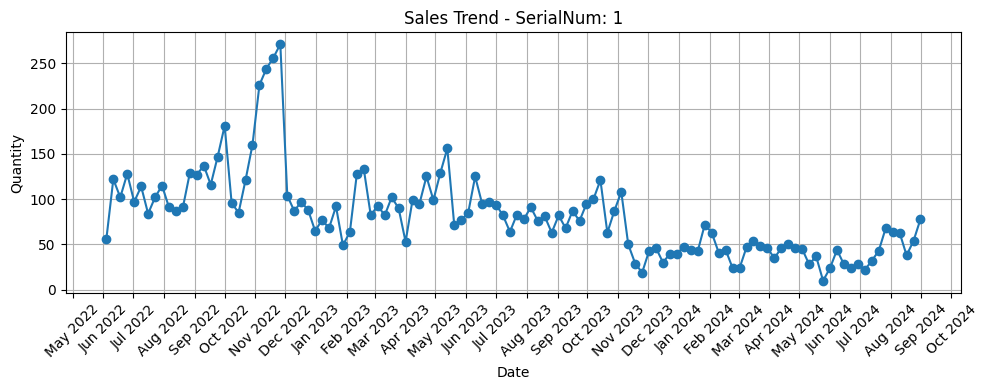

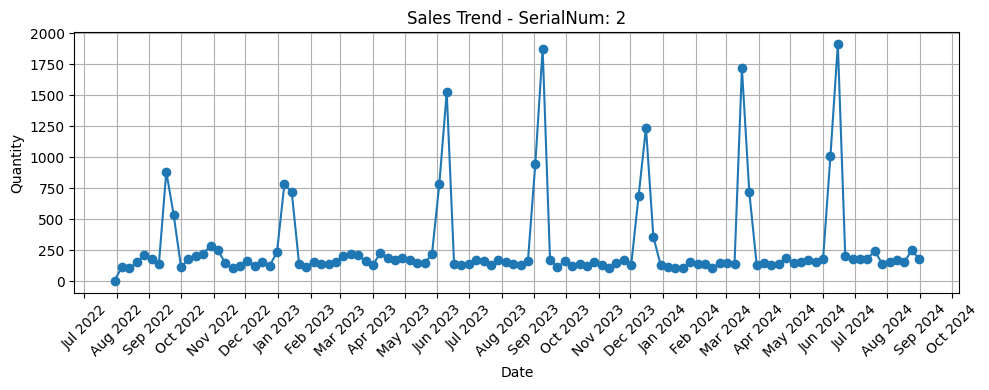

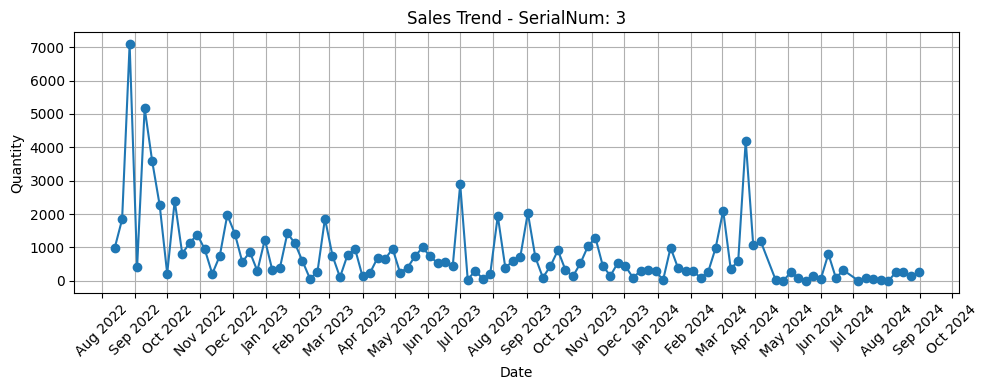

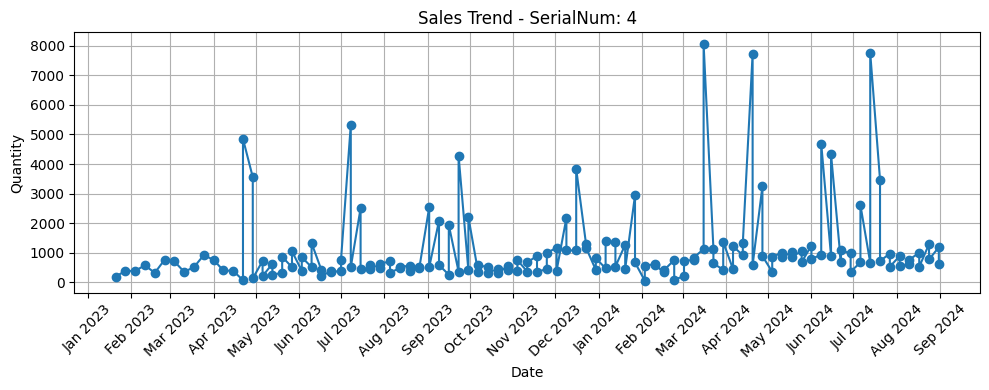

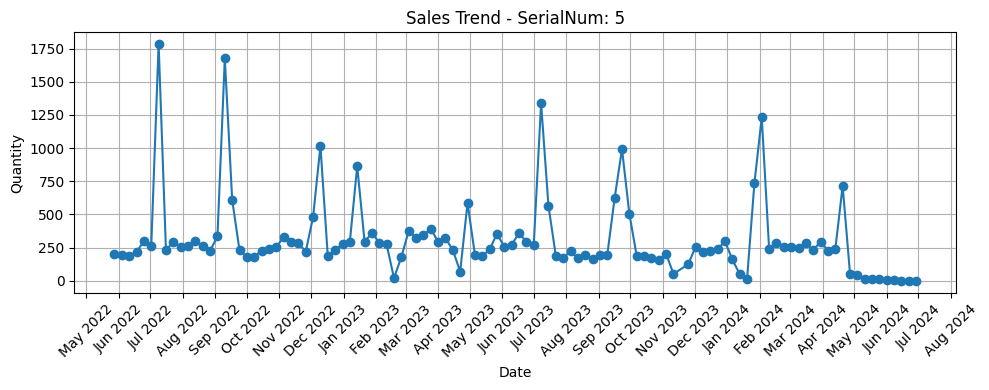

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#convert the 'weekend_date' column to datetime format
df['weekend_date'] = pd.to_datetime(df['weekend_date'], errors='coerce')

# Plot quantity over time for a few SerialNum
sample_ids = np.sort(df['serial_num'].unique())  # First 3 products

for serial in sample_ids:
    temp = df[df['serial_num'] == serial].sort_values(by='weekend_date')
    plt.figure(figsize=(10, 4))
    plt.plot(temp['weekend_date'], temp['quantity'], marker='o')
    plt.title(f"Sales Trend - SerialNum: {serial}")
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.grid(True)

    # Format x-axis
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45)  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()


In [18]:
temp.head()

,weekend_date,channel,brand,category,sub_category,serial_num,quantity
224,2022-05-28,Channel2,B1,Cat1,Sub-Cat1,5,203
225,2022-06-04,Channel2,B1,Cat1,Sub-Cat1,5,198
226,2022-06-11,Channel2,B1,Cat1,Sub-Cat1,5,188
227,2022-06-18,Channel2,B1,Cat1,Sub-Cat1,5,219
228,2022-06-25,Channel2,B1,Cat1,Sub-Cat1,5,299


In [19]:
df.head()

,weekend_date,channel,brand,category,sub_category,serial_num,quantity
17,2022-10-01,Channel1,B1,Cat2,Sub-Cat2,1,181
252,2022-10-01,Channel2,B2,Cat3,Sub-Cat3,2,115
251,2022-10-01,Channel2,B1,Cat1,Sub-Cat1,5,180
125,2022-10-01,Channel3,B1,Cat3,Sub-Cat4,3,214
43,2023-04-01,Channel1,B1,Cat2,Sub-Cat2,1,53


## Statistical Summary

In [20]:
df.describe()

,weekend_date,serial_num,quantity
count,600,600.000000,600.000000
mean,2023-08-26 23:14:24,3.048333,547.330000
min,2022-05-28 00:00:00,1.000000,1.000000
25%,2023-03-09 06:00:00,2.000000,121.000000
50%,2023-09-05 12:00:00,3.000000,244.500000
75%,2024-03-02 00:00:00,4.000000,624.500000
max,2024-08-31 00:00:00,5.000000,8051.000000
std,NaN,1.399737,925.749108


In [21]:
df['channel'].value_counts()

channel
Channel2    376
Channel1    118
Channel3    106
Name: count, dtype: int64

# *Sales Quantity by Category depicted by boxplot*

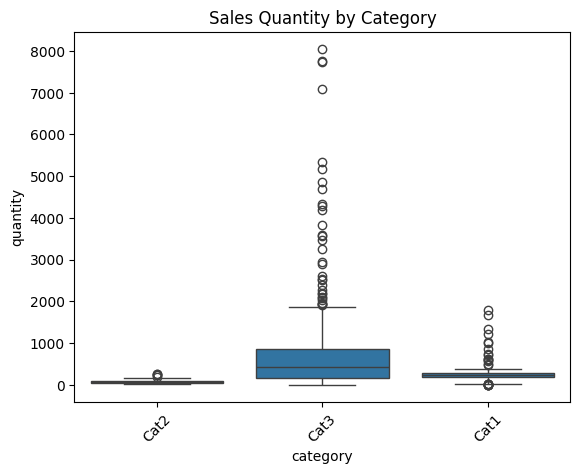

In [22]:
sns.boxplot(data=df, x="category", y="quantity")
plt.title("Sales Quantity by Category")
plt.xticks(rotation=45)
plt.show()

*One can clearly see that the Category 3 products have higher Sales quantity compared to cat2 and cat 1 products*

## After Removing Outliers

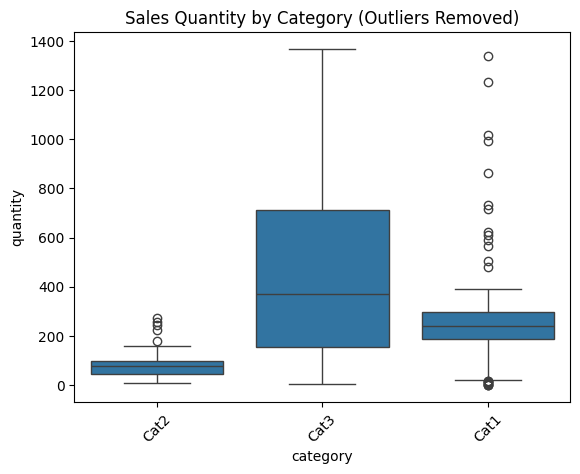

In [23]:
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[(df['quantity'] >= Q1 - 1.5 * IQR) & (df['quantity'] <= Q3 + 1.5 * IQR)]

sns.boxplot(data=df_no_outliers, x="category", y="quantity")
plt.title("Sales Quantity by Category (Outliers Removed)")
plt.xticks(rotation=45)
plt.show()

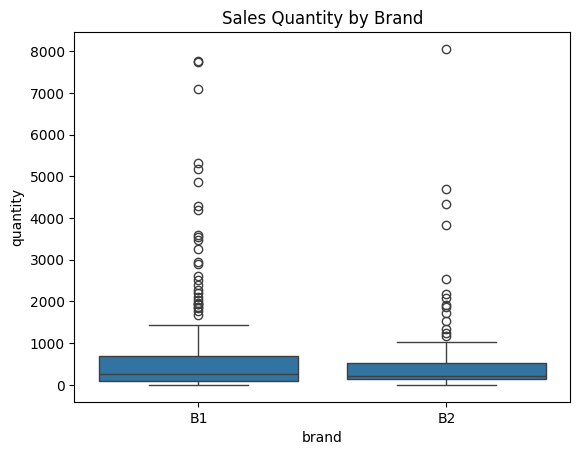

In [24]:
sns.boxplot(data=df, x='brand', y='quantity')
plt.title("Sales Quantity by Brand")
plt.show()


## Both brand B1 and B2 products are well distributed across the quantities

# *Currently the difference between consecutives dates is not just 7 Days*

In [25]:
df['date_diff'] = df['weekend_date'].diff()
print(f"The difference between consecutive dates is:\n{df['date_diff'].value_counts()}")

The difference between consecutive dates is:
date_diff
0 days       481
427 days      26
-700 days     12
91 days       11
-336 days      9
154 days       9
-273 days      7
-609 days      6
518 days       5
-245 days      5
273 days       5
63 days        4
28 days        4
-182 days      3
182 days       2
-91 days       2
-203 days      1
378 days       1
140 days       1
35 days        1
574 days       1
245 days       1
308 days       1
-364 days      1
Name: count, dtype: int64


## *Now we group them by dates to make the difference same across dates i.e 7 days*

In [26]:
df = df.groupby('weekend_date', as_index=False).agg({'quantity': 'sum'})

In [27]:
df['date_diff'] = df['weekend_date'].diff()
print(f"Now after groupby the difference between consecutive dates is:\n{df['date_diff'].value_counts()}")

Now after groupby the difference between consecutive dates is:
date_diff
7 days    118
Name: count, dtype: int64


In [28]:
print(f'The shape of the dataset is reduced to {df.shape[0]} rows after group by operation.')

The shape of the dataset is reduced to 119 rows after group by operation.
